In [1]:
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
try:
    data = np.loadtxt('/Users/chaitanyagupta/Desktop/machine-learning/Logistic_Regression/ex2/ex2data1.txt', delimiter=',')
except:
    data = np.loadtxt('/home/chaitanya/Desktop/machine-learning/Logistic_Regression/ex2/ex2data1.txt', delimiter=',')

x = data[:, :-1]

y = data[:, -1:]

pos = np.array([x[i] for i in range(x.shape[0]) if y[i] == 1])
neg = np.array([x[i] for i in range(x.shape[0]) if y[i] == 0])

m, n = x.shape[0], x.shape[1]
    

x0 = np.ones(m)

X = np.c_[x0, x]

### Plotting the data

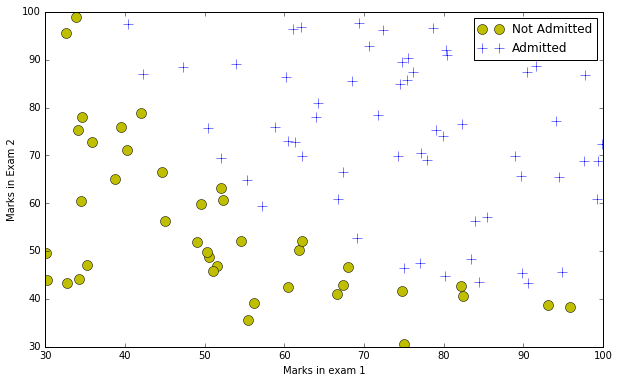

In [3]:
plt.figure(figsize=(10,6))

plt.plot(neg[:, 0],neg[:, 1], 'yo', markersize=10, label = "Not Admitted")
plt.plot(pos[:, 0], pos[:, 1], 'b+', markersize=10, label = "Admitted")

plt.ylabel('Marks in Exam 2')
plt.xlabel('Marks in exam 1')
plt.legend()

In [4]:
# Sigmoid Function
def g(z):
    return (1 / (1 + np.exp(-z)))

# Cost Function
def J(theta, X, y):
    
    hypothesis  = g(np.dot(theta, X))
    
    error = -1 *(1/m) * (np.dot(np.log(hypothesis), y)+ np.dot(np.log(1-hypothesis), (1-y)))

    return error

# Gradient Function
def gradient(theta, X, y):
    '''Gradient of log likelehood function'''
    hypo = g(np.dot(X, theta))
    
    grad =  (1/m) * np.dot(X.T, (hypo-y))
    
    return grad

In [5]:
theta = np.zeros(n + 1)

l_rate = 0.01

iters = 400

Jn = J(theta, X, y)

print("Initial Error: ", Jn)


## Able to calculate initial error


error_pts = []

for i in range(iters):
        
    Jn = J(theta, X, y)
        
    error_pts.append(Jn)
        
#     grad = gradient(theta, X, y)

#     theta = theta -  l_rate * grad                 
        
print("Final Error: ", Jn)

print("Parameters:", grad)


ValueError: shapes (3,) and (100,3) not aligned: 3 (dim 0) != 100 (dim 0)